In [201]:
import os
import nltk
import pandas
import re

In [202]:
classDict = {'neg': 0, 'pos': 1,'ntr': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('./data.txt'))
    rel_path = "data.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
    print('read file complete')
    
    return sentences, labels

In [203]:
sentences, labels = read_File()

read file complete


In [204]:
import pandas as pd

data = {'label': labels,
        'sentence': sentences
        }

df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head()

,label,sentence
0,pos,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
1,neg,"কি বিচিত্র এই দেশ, আর একজন ক্বারি ওবায়দুল্ল..."
2,pos,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
3,pos,"অভিনন্দন তোমা‌কে মুস্তা‌ফিজ, তু‌মি এর উপযুক্ত..."
4,pos,আলহামদুলিল্লাহ। অভিনন্দন সাতক্ষীরা বাসির অহংকা...


In [205]:
df.describe(include='all')

,label,sentence
count,2449,2449
unique,3,2419
top,neg,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
freq,1367,3


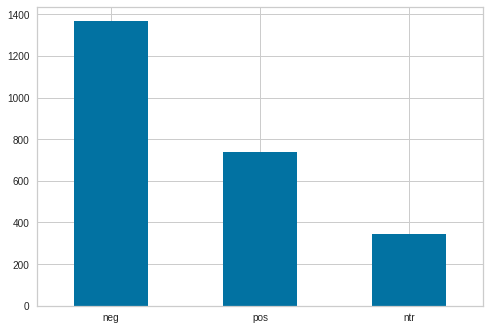

In [206]:
df['label'].value_counts().plot(kind="bar", rot=0)

In [104]:
# def clean_sentence(sent):

#     # # sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$>, ' ', sent')
#     sent = re.sub(r'(\W)(?=\1)', '', sent)
#     sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
#     # # sent = re.sub(r'\, ' ', sent')
#     sent = re.sub(r'&', '', sent) 
#     sent = re.sub(r'', ' ', sent)
#     sent = re.sub(r'\'', ' ', sent)
#     sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
#     sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
#     sent = sent.strip()
#     sent=re.sub('[^A-Za-z0-9]+', '', sent)
#     return sent



In [207]:
def data_cleaning(articles):
    articles_data_clean = articles.replace('\n', ' ')
    articles_data_clean = re.sub(
        '[^\u0980-\u09FF]', ' ', str(articles_data_clean))
    stop_words = open('./stopword.txt', 'r',
                      encoding='utf-8').read().split()
    result = articles_data_clean.split()
    articles_data_clean = [word.strip()
                           for word in result if word not in stop_words]
    articles_data_clean = " ".join(articles_data_clean)
    # print(articles_data_clean)
    return articles_data_clean

In [208]:
df.loc[5,'sentence']

'2016 আইসিসি বর্ষসেরা উদীয়মান ক্রিকেটার হলেন কাটার মাস্টার খ্যাত "মুস্তাফিজুর রহমান"।            ߑͰߑ̰ߒנ    অভিনন্দন ফিজজ,,,ߎɰߎɰߎɍ\n'

In [209]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'clean_sentence'] = data_cleaning(sent)
    

In [211]:
test = df.loc[5,'clean_sentence']
test

'আইসিসি বর্ষসেরা উদীয়মান ক্রিকেটার হলেন কাটার মাস্টার খ্যাত মুস্তাফিজুর রহমান অভিনন্দন ফিজজ'

In [213]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [214]:
stop_words = {'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্য', 'অন্তত', 'অবধি', 'অবশ্য', 'আই',
       'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আছে', 'আপনার', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য','আপনি','এ','এমনি','ও','কয়েক','করেছিলেন'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [215]:

t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : আইসিসি বর্ষসেরা উদীয়মান ক্রিকেটার হলেন কাটার মাস্টার খ্যাত মুস্তাফিজুর রহমান অভিনন্দন ফিজজ
after : আইসিসি বর্ষসেরা উদীয়মান ক্রিকেটার হলেন কাটার মাস্টার খ্যাত মুস্তাফিজুর রহমান অভিনন্দন ফিজজ


In [216]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

In [217]:

from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)
word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names()
print(len(stpGram))

31994


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [256]:

word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 3), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)
word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()
print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])



     


51685
sample of bigram :  অংশকে ধরণের দিনে


In [257]:
import numpy as np
def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [258]:
def sentence_to_vector(data, stpGram):
    dataForSVM = []
    colName = []
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)
        
    return dataForSVM

In [259]:

dataForSVM = sentence_to_vector(df['clean_data'], stpGram_rsw)
dataForSVM[0:4]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataForSVM, label2id, test_size=0.2, random_state=0)

In [261]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)

In [156]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 124013 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 48.9 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=4b7b41c0cec440b468ccaa54cef4fd595ec1b3e966878f11b7a3f9e468dea426
  Stored in directory: /root/.cache/pip/wheels/e2/96/fb/b17d6b9adb7c223428b4c77d9e8bc29f40a51d625389b73461
Successfully built libarchive


In [158]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 24.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 24.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 51.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 58.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 60.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing 

In [163]:
pip install sklearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=7ccd80675ff2170197bde0c7eb23d5ae5c0d371bdaf31e24831b1647302f2cff
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [164]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [262]:
import joblib
import joblib as jb
filename = 'svc_model.sav'
jb.dump(linear_svc, filename)

['svc_model.sav']

In [263]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def calculate_accuracy(kernel, model):
    y_pred = model.predict(X_test)
    #print the accuracy score of the model
    print(kernel + " accuracy : ",metrics.accuracy_score(y_test, y_pred, normalize = True))
    score = confusion_matrix(y_test, y_pred)
    print('confusion_matrix: \n', score)

In [264]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer

def report(model):
    visualizer = ClassificationReport(model, classes=['Won','Loss'])
    visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    g = visualizer.poof() # Draw/show/poof the data

In [265]:
calculate_accuracy(kernel='linear', model=linear_svc)
# report(model=linear_svc)

linear accuracy :  0.7
confusion_matrix: 
 [[234  24  14]
 [ 42  98   7]
 [ 44  16  11]]


In [266]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc = rbf_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=rbf_svc)
# report(model=rbf_svc)

rbf accuracy :  0.6
confusion_matrix: 
 [[267   4   1]
 [122  25   0]
 [ 68   1   2]]


In [267]:
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc = poly_svc.fit(X_train, y_train)
calculate_accuracy(kernel='rbf', model=poly_svc)

rbf accuracy :  0.5551020408163265
confusion_matrix: 
 [[272   0   0]
 [147   0   0]
 [ 71   0   0]]


In [268]:
def calculate_accuracy(predictions, actual, modelName):
    total = len(predictions)
    idx = 0
    error = 0
    almostSame = 0
    while idx < total:
        if predictions[idx] != actual[idx]:
            p = predictions[idx]
            a = actual[idx]
            # print('actual=',y_test[idx],'  predict=',predictions[idx])
            if ((a == 0 or a == 1) and (p == 0 or p == 1)) or ((a == 3 or a == 4) and (p == 3 or p == 4)):
                almostSame += 1
            else:
                error += 1
        idx += 1
    print('\n', modelName, '\n')
    print("total=", total)
    print("error=", error)
    print("accuracy = ", ((total - error) * 100) / total)
    print('almost same = ', almostSame)
    print("actual accracy = ", ((total - error - almostSame) * 100) / total)

In [269]:
y_pred = linear_svc.predict(X_test)
calculate_accuracy(y_pred, y_test, 'Linear')

y_pred_rbf = rbf_svc.predict(X_test)
calculate_accuracy(y_pred_rbf, y_test, 'rbf_svc')

y_pred_poly = poly_svc.predict(X_test)
calculate_accuracy(y_pred_poly, y_test, 'poly_svc')


 Linear 

total= 490
error= 81
accuracy =  83.46938775510205
almost same =  66
actual accracy =  70.0

 rbf_svc 

total= 490
error= 70
accuracy =  85.71428571428571
almost same =  126
actual accracy =  60.0

 poly_svc 

total= 490
error= 71
accuracy =  85.51020408163265
almost same =  147
actual accracy =  55.51020408163265


In [270]:
from sklearn.ensemble import AdaBoostClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:

    abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=learning_rate)
    
    abc_model = abc.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(abc_model.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(abc_model.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.644
Accuracy score (validation): 0.627
Learning rate:  0.075
Accuracy score (training): 0.650
Accuracy score (validation): 0.633
Learning rate:  0.1
Accuracy score (training): 0.671
Accuracy score (validation): 0.641
Learning rate:  0.25
Accuracy score (training): 0.696
Accuracy score (validation): 0.659
Learning rate:  0.5
Accuracy score (training): 0.712
Accuracy score (validation): 0.673
Learning rate:  0.75
Accuracy score (training): 0.736
Accuracy score (validation): 0.682
Learning rate:  1
Accuracy score (training): 0.741
Accuracy score (validation): 0.692


In [271]:
sent = 'এটা আমাদের বাংলাদেশের গর্ব সাবাস বাই মোস্তাফিজ'

sent = data_cleaning(sent)
sent2vec =sentence_to_vector_transform(sent, stpGram)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = jb.load(filename)
print(sent_list)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[array([0, 0, 0, ..., 0, 0, 0])]


ValueError: ignored